# KNN Classification

**Importing the Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Importing and Visualizing the Data**

In [2]:
data = pd.read_csv("gene_expression.csv")
data

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


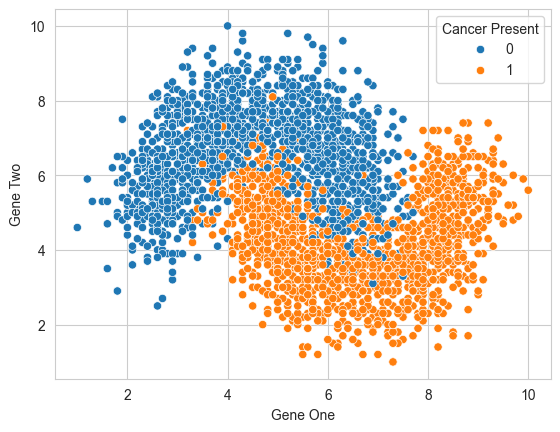

In [3]:
plt.figure(dpi=100)
sns.scatterplot(data, x="Gene One", y="Gene Two", hue="Cancer Present");

<Figure size 640x480 with 0 Axes>

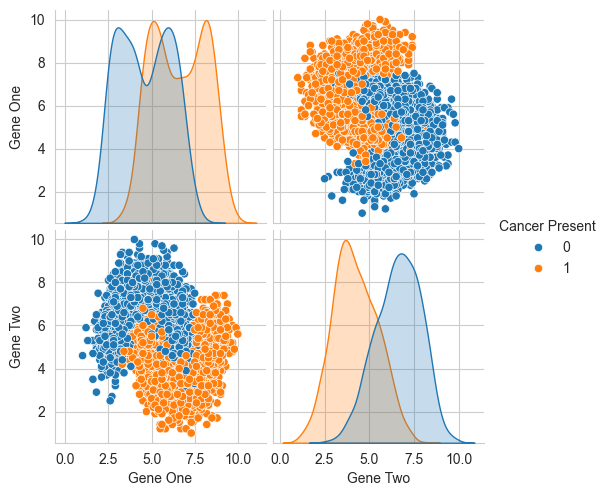

In [4]:
plt.figure(dpi=100)
sns.pairplot(data, hue="Cancer Present");

**Splitting the data into Independent and Dependent Features**

In [5]:
x = data.drop(columns=["Cancer Present"])
y = data["Cancer Present"]

**Splitting the Dependent Features into the Training and Testing Data**

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=16)

**Scaling the Training and Testing Data of Dependent Features**

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

**Implementing the KNN Classifier with neighbours of 1**

In [8]:
from sklearn.neighbors import KNeighborsClassifier
classifier_model = KNeighborsClassifier(n_neighbors=1)
classifier_model.fit(x_train_scaled, y_train)
y_pred = classifier_model.predict(x_test_scaled)

**Evaluating the Performance Matrices**

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix -\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report -\n", classification_report(y_test, y_pred))

Confusion Matrix -
 [[144  20]
 [ 11 125]]

Classification Report -
               precision    recall  f1-score   support

           0       0.93      0.88      0.90       164
           1       0.86      0.92      0.89       136

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300


**Implementing the Elbow Methods with Neighbour of 1 to 30**

In [10]:
from sklearn.metrics import accuracy_score
test_error_rate = []

for k in range(1, 30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train_scaled, y_train)
    y_pred_test = knn_model.predict(x_test_scaled)
    test_error_rate.append(1-accuracy_score(y_test, y_pred_test))

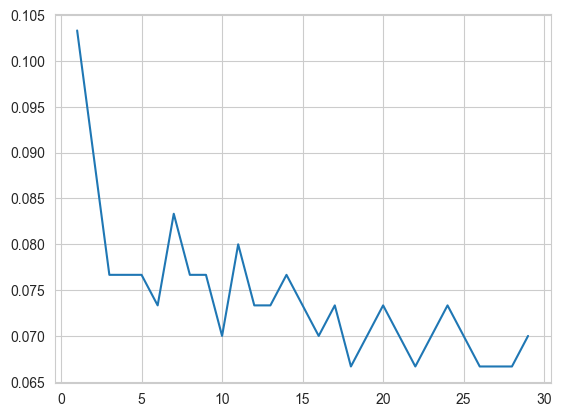

In [11]:
plt.figure(dpi=100)
plt.plot(range(1, 30), test_error_rate);

**Implementing the Pipeline on the KNN with Hyper Parameters**

In [12]:
scaler = StandardScaler()
knn = KNeighborsClassifier()

In [13]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [14]:
operations = [('scaler', scaler), ('knn', knn)]

In [15]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(operations)

In [16]:
from sklearn.model_selection import GridSearchCV
k_values = list(range(1, 20))
param_grid = {'knn__n_neighbors': k_values}
full_cv_classifier = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")
full_cv_classifier.fit(x_train, y_train);

In [17]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=19))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=19),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 19,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [18]:
full_cv_classifier.best_score_

0.9355555555555556

In [19]:
full_cv_classifier.best_params_

{'knn__n_neighbors': 19}

In [20]:
full_pred = full_cv_classifier.predict(x_test)

**Evaluating the Performance Matrices on the Pipeline** 

In [21]:
print("Classification Matrices -\n", classification_report(y_test, full_pred))
print("Confusion Matrices -\n", confusion_matrix(y_test, full_pred))

Classification Matrices -
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       164
           1       0.91      0.93      0.92       136

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

Confusion Matrices -
 [[152  12]
 [  9 127]]
